In [1]:
import torch
import numpy as np
from torchvision.datasets import Flowers102
import torchvision.transforms as transforms

from src.utils import draw_patches
from src.color_histograms_entropy_sampler import ColorHistogramsEntropySampler

In [2]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

flowers = Flowers102("../data/flowers", transform=transform)

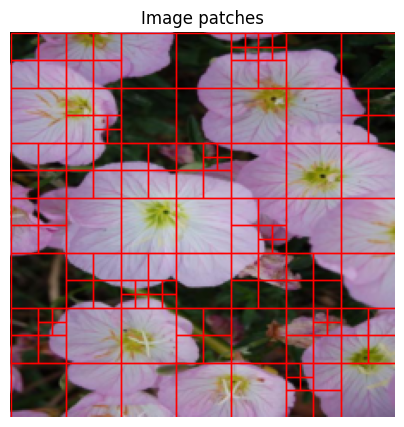

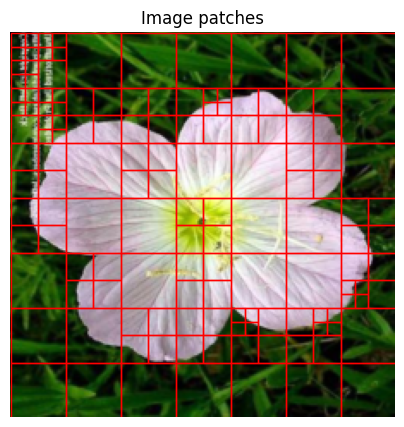

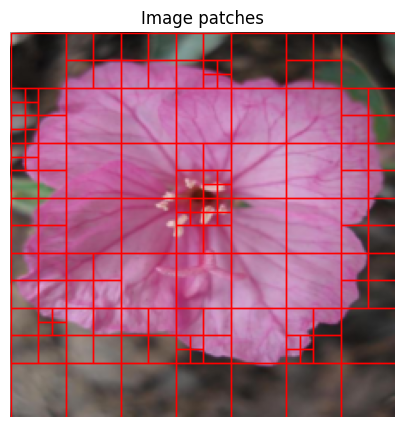

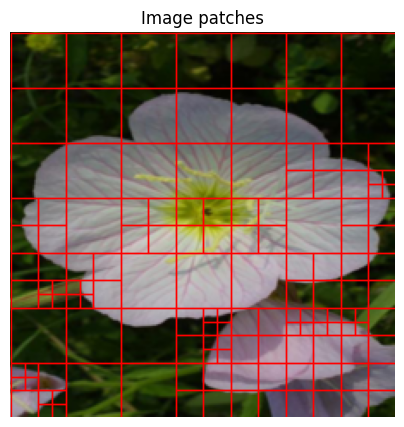

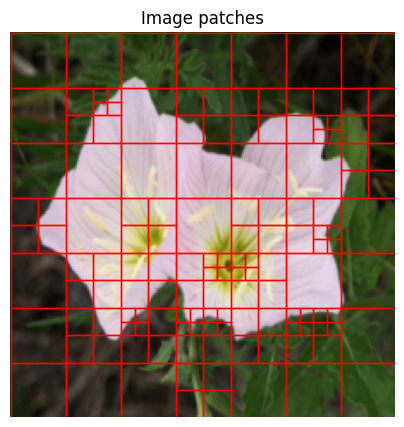

In [4]:
patch_sampler = ColorHistogramsEntropySampler(patch_size=(32, 32), n_patches_in_stages=[20, 10])

for i in range(5):
    img = flowers[i][0]
    patches, coords = patch_sampler(img)

    coords_for_draw_patches = []
    for j in range(coords.shape[0]):
        coords_for_draw_patches.append((np.array([coords[j][0], coords[j][1]]),
                                        np.array([coords[j][2], coords[j][3]])))
    draw_patches(img.numpy().swapaxes(0, 2), coords_for_draw_patches, color="red")